# Context

#### Netflix data collected till April 2021: Combines data sources from Netflix, Rotten Tomatoes, IMBD, posters, box office information, trailers on YouTube, and more using a variety of APIs

# Motivation/ Endgame

##### There are so many Netflix shows and movies out there and sometimes there are just too many to choose from. In addition to that, many a times the quality of the movie/ show is questionable. Thus, this assignment serves as a tool to recommend to the user a particular movie/ show that he/she is interested in accurately.

##### This is accomplished by:
* Performing basic data visualisation
* Introduce an unsupervised learning model to analyse the data and come up with a recommender 
* Discuss any other interesting findings


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

In [2]:
# load the csv file into dataframe
data = pd.read_csv("../Dataset/netflix-rotten-tomatoes-metacritic-imdb.csv")

In [3]:
# View the first 5 rows of the data
data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [4]:
# get an overview of the data type and entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [5]:
# summary of the statistics for numerical entries
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


### 1. Data Preprocessing
#### Before we can perform PCA:
* Lets take out some redundent variables that wont be needed when it comes to recommending a movie.
    * More important features: 'Genre', 'Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score', 'IMDb Votes'
* Choose the first label in "Genre" to be the genre of the movie/ series
* Drop all the rows with NA entries for simplicity 

In [6]:
# choose only those variables required
filter1 = data.loc[:,['Title','Summary','Genre', 'Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score', 'IMDb Votes']]
# clean "Genre" column
filter1['Genre'] = filter1.Genre.str.split(r",").str.get(0)
# # clean "Languages" column 
# filter1['Languages'] = filter1.Languages.str.split(r",").str.get(0)
# Finally, drop all entries with NA
filter2 = filter1.dropna().reset_index(drop=True)
data1 = pd.get_dummies(filter2.loc[:,['Genre', 'Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score', 'IMDb Votes']])
data1


,Hidden Gem Score,IMDb Score,IMDb Votes,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western,Series or Movie_Movie,Series or Movie_Series,Runtime_1-2 hour,Runtime_30-60 mins,Runtime_< 30 minutes,Runtime_> 2 hrs
0,4.3,7.9,205926.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,7.0,5.8,2838.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,6.4,4.3,1720.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,7.7,6.5,1147.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,8.1,6.3,63.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,8.6,7.3,14.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
13332,8.8,7.8,174.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
13333,8.4,6.8,71.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13334,8.2,6.4,82.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### 2. First round of PCA

In [7]:
pca = PCA()
pca.fit(data1)

PCA()

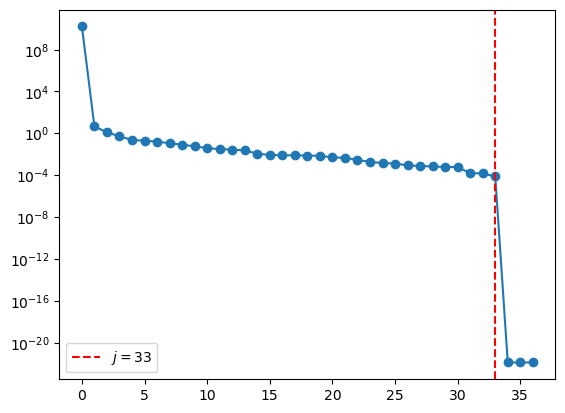

In [8]:
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=33, c='r', ls='--', label=r'$j=33$')
plt.legend()

Text(0.5, 1.0, 'Third Principal Component Axis')

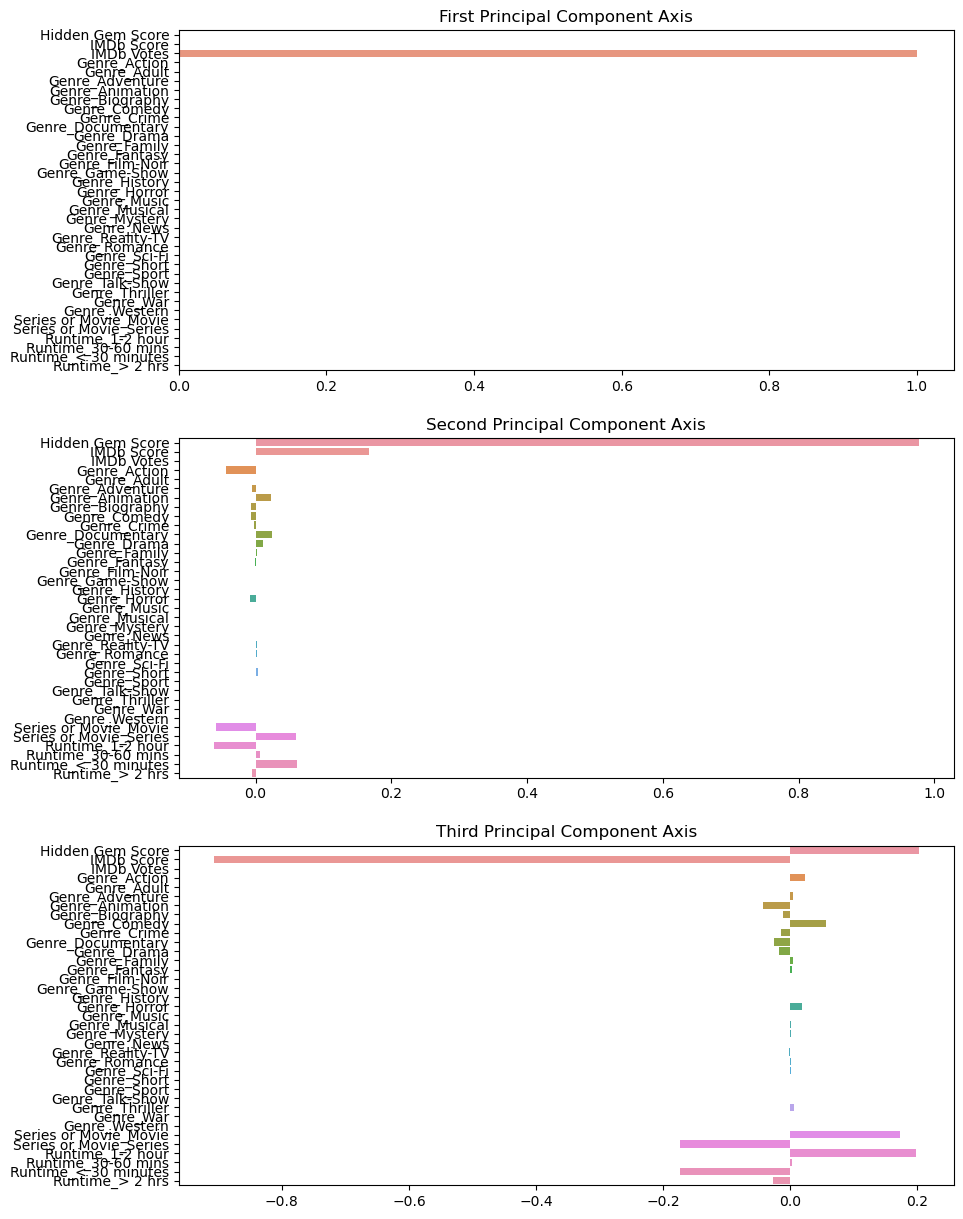

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x=pca.components_[0], y=data1.columns, orient='h', ax=ax[0])
sns.barplot(x=pca.components_[1], y=data1.columns, orient='h', ax=ax[1])
sns.barplot(x=pca.components_[2], y=data1.columns, orient='h', ax=ax[2])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')

* Initial PCA shows that the first principal component is dominated by the variable IMDb votes 
* This is not correct and upon closer inspection, I realise I forgot to scale the variable such that the magnitude is too big compared to the other numerical variable :( 

### 3. Second round of PCA

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# normalise the data
scaler = MinMaxScaler()
data1_normalised = pd.DataFrame(scaler.fit_transform(data1), index=data1.index, columns=data1.columns)
data1_normalised

,Hidden Gem Score,IMDb Score,IMDb Votes,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western,Series or Movie_Movie,Series or Movie_Series,Runtime_1-2 hour,Runtime_30-60 mins,Runtime_< 30 minutes,Runtime_> 2 hrs
0,0.402174,0.793103,0.087470,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.695652,0.551724,0.001203,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.630435,0.379310,0.000728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.771739,0.632184,0.000485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.815217,0.609195,0.000025,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,0.869565,0.724138,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13332,0.891304,0.781609,0.000072,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13333,0.847826,0.666667,0.000028,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13334,0.826087,0.620690,0.000033,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
pca.fit(data1_normalised)

PCA()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


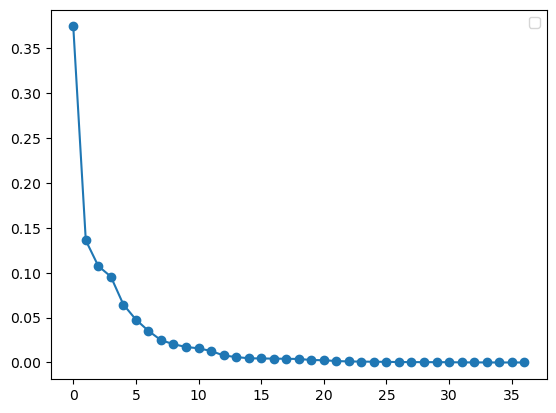

In [13]:
plt.plot(pca.explained_variance_ratio_, '-o')
# plt.axvline(x=14, c='r', ls='--', label=r'$j=14$')
plt.legend()

Text(0.5, 1.0, 'Third Principal Component Axis')

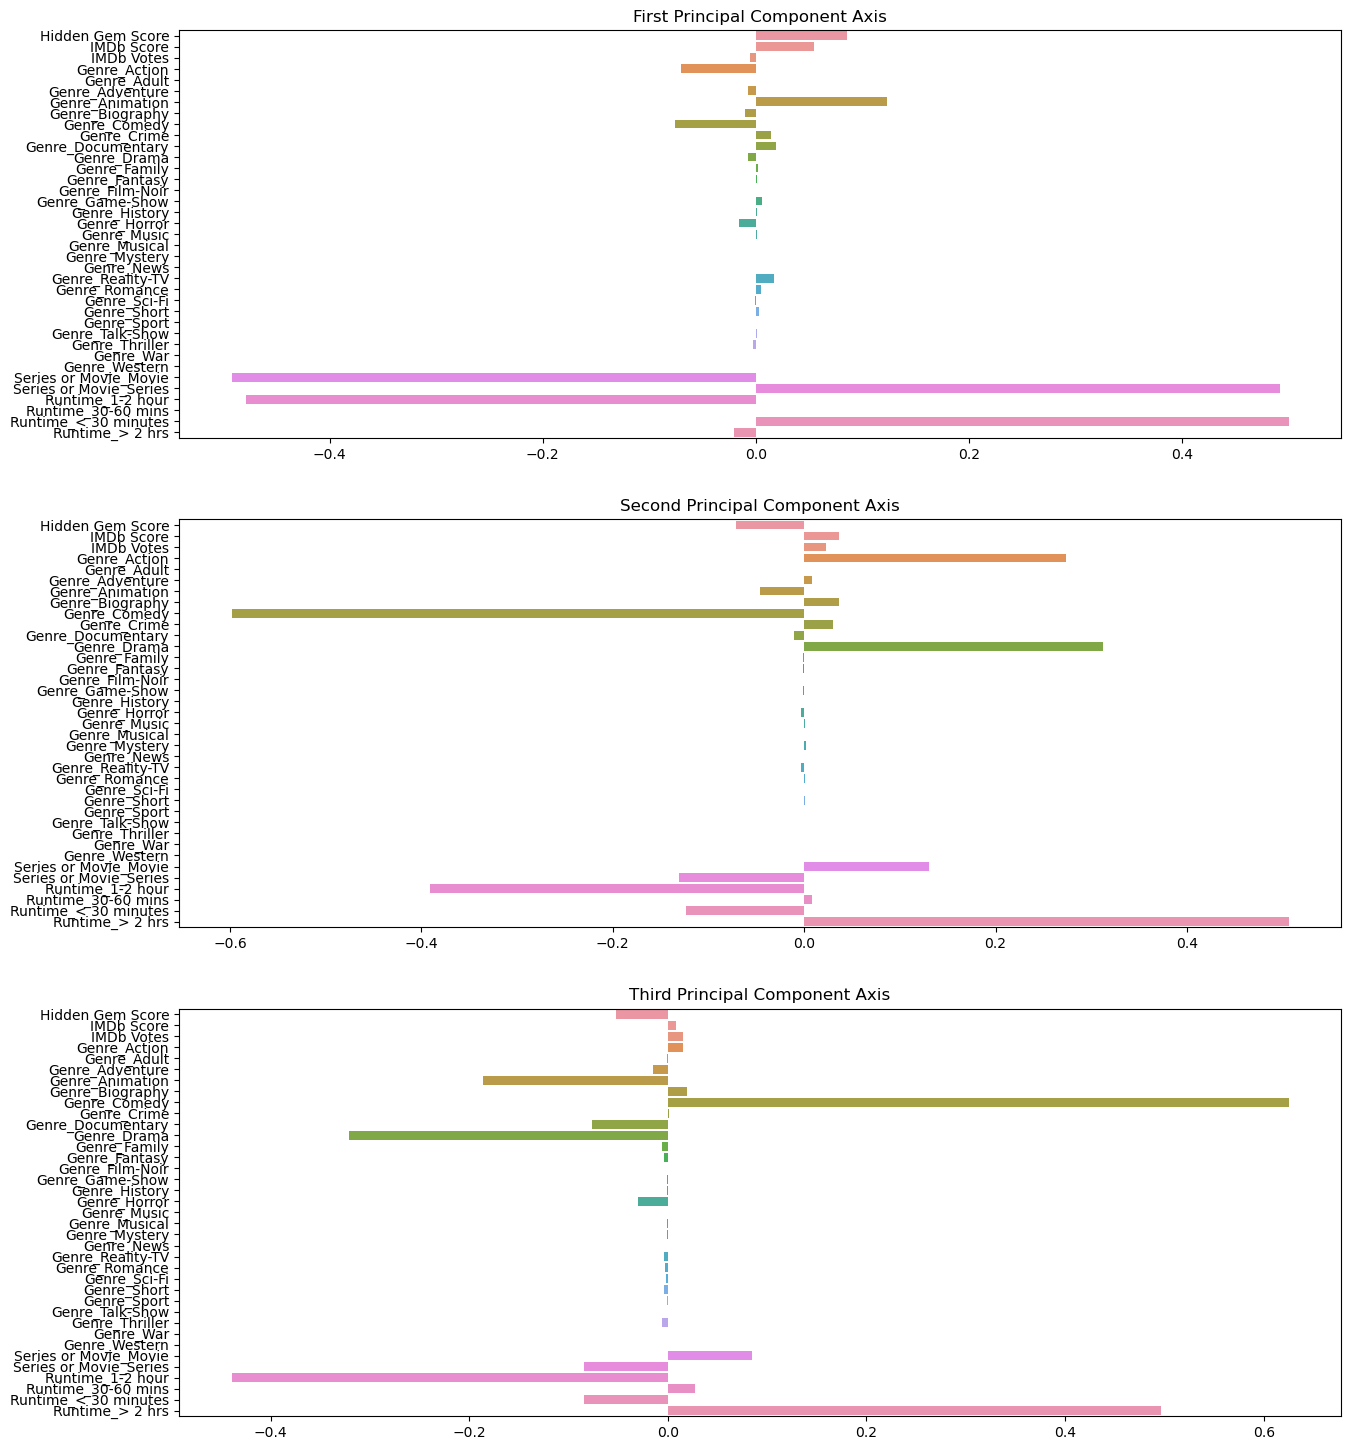

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))
sns.barplot(x=pca.components_[0], y=data1_normalised.columns, orient='h', ax=ax[0])
sns.barplot(x=pca.components_[1], y=data1_normalised.columns, orient='h', ax=ax[1])
sns.barplot(x=pca.components_[2], y=data1_normalised.columns, orient='h', ax=ax[2])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')

In [15]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_)[0:14])*100, 2))

Variance of each component: [3.74261939e-01 1.35993833e-01 1.07384593e-01 9.56357031e-02
 6.45503683e-02 4.77882773e-02 3.52159160e-02 2.49037711e-02
 2.03634267e-02 1.72879393e-02 1.57607646e-02 1.28099085e-02
 7.81781156e-03 6.06347771e-03 4.68921674e-03 4.46301409e-03
 4.30092473e-03 4.10620431e-03 3.92223134e-03 2.75781850e-03
 2.50287478e-03 1.60943502e-03 1.14428582e-03 9.96992200e-04
 8.11620851e-04 7.11027779e-04 4.78804800e-04 4.19734665e-04
 3.76332475e-04 3.37640847e-04 3.24129631e-04 8.72313159e-05
 8.10383229e-05 4.17128617e-05 7.38101530e-32 3.93595643e-33
 3.79536163e-33]

 Total Variance Explained: 96.58


### As can be seen above, it is ok to reduce the principal components from 38 to 15 as majority of the variance in this dataset (96.57%) is being captured

### 4. Build a recommendation system using K-Means clustering method

Lets build a recommendation system base on the above features which has reduced dimension

In [16]:
pca = PCA(n_components=15)
data1 = pca.fit_transform(data1_normalised)

In [17]:
# calculate the losses for each clusters
losses = []
for K in range(1, 100):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data1)
    losses.append(kmeans.inertia_)

Text(0, 0.5, 'Loss')

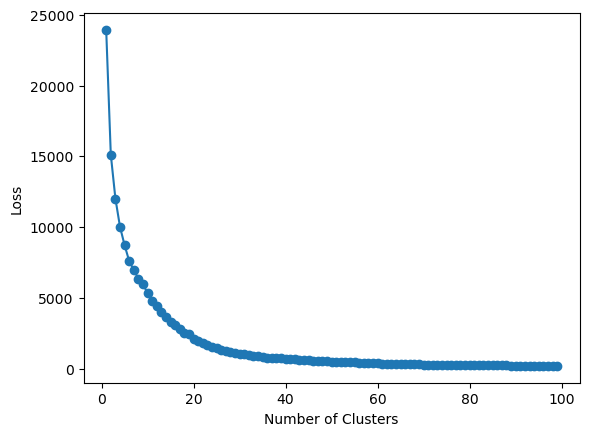

In [18]:
plt.plot(range(1,100), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

In [19]:
kmeans = KMeans(n_clusters= 7)

In [20]:
# fit data2 which has reduced dimensions into the kmeans model and predict the clusters
label = kmeans.fit_predict(data1)

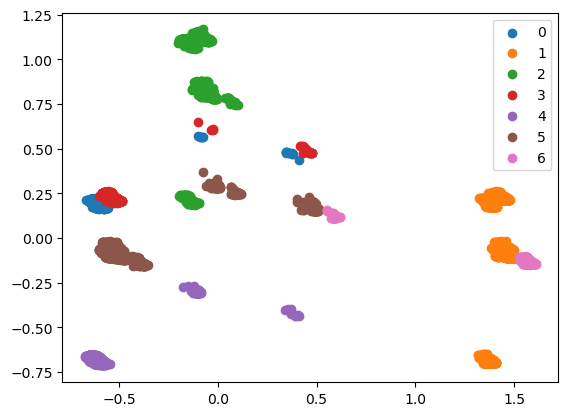

In [21]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data1[label == i , 0] , data1[label == i , 1] , label = i)
plt.legend()
plt.show()

In [22]:
# calculate the euclidean distance of each of the 15 components to the centre
euclid_dist = kmeans.fit_transform(data1)
euclid_dist

array([[2.26752758, 2.45252951, 1.05622961, ..., 2.45359694, 2.25138757,
        2.1785448 ],
       [1.24036989, 1.44440957, 2.1920356 , ..., 1.41931841, 1.71210241,
        1.09017691],
       [1.2674571 , 1.44473538, 2.22247336, ..., 0.23895264, 1.65411065,
        1.09835923],
       ...,
       [2.00690893, 2.48404939, 0.79537809, ..., 2.45187915, 2.29920603,
        2.28873147],
       [2.00552138, 2.47883239, 0.79467862, ..., 2.44920925, 2.29657874,
        2.28426462],
       [2.00530136, 2.47660396, 0.79552453, ..., 2.44826155, 2.29567861,
        2.28244463]])

In [23]:
# compute the distance between each of the summaries in the cluster-space
def recommend(movie_id, num_recommendation=5):
    """
    A simple recommender system using PCA
    """
    print(f'You have watched:\n\n{filter2.Title[movie_id]}')
    print(f'Brief Summary:\n\n{filter2.Summary[movie_id]}')
    
    scores = euclid_dist[:, :10]
    
    # Compute L^2 distances to the input Score
    distances = np.sqrt(np.sum((scores - scores[movie_id, np.newaxis, :])**2, axis=1))
    
    # Return recommendations based on the closest L^2 distances 
    rec_ids = np.argsort(distances)[1:1+num_recommendation]
    rec_desc = filter2.Summary[rec_ids].to_numpy()
    print('\n\nThe recommended movie for you to watch next is:\n')
    for i, d in zip(rec_ids, rec_desc):
        print(f'Title: {filter2.Title[i]}\n Brief Summary: {d}')

In [24]:
recommend(11188)

You have watched:

Spider-Man 2
Brief Summary:

Weary of leading a double life, Peter Parker shelves his superhero identity. Will he suit up again when a multitentacled baddie menaces New York City?


The recommended movie for you to watch next is:

Title: Mission: Impossible 5
 Brief Summary: When the IMF is dissolved, Ethan Hunt and his allies launch their own war against the Syndicate, a group of renegade spies bent on world destruction.
Title: Only the Brave
 Brief Summary: While others flee fires, the Granite Mountain Hotshots run toward them. A fateful blaze forges an elite firefighting team of heroes in this true tale.
Title: Sicario
 Brief Summary: An FBI agent takes part in an undercover operation targeting a Mexican drug lord, but her ethics are challenged when the sting crosses the line.
Title: King Kong
 Brief Summary: Peter Jacksons remake of the classic follows a group of adventurous explorers and filmmakers to Skull Island, where they search for a giant gorilla.
Title: M

This time, the recommendation is base on the summary of the movie/ series.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# create dataframe consisting of the movie/ series name and it's summary
movie_series = data.loc[:,["Title","Summary"]]
movie_series

,Title,Summary
0,Lets Fight Ghost,A med student with a supernatural gift tries t...
1,HOW TO BUILD A GIRL,"When nerdy Johanna moves to London, things get..."
2,Centigrade,"Trapped in a frozen car during a blizzard, a p..."
3,ANNE+,"Upon moving into a new place, a 20-something r..."
4,Moxie,Inspired by her moms rebellious past and a con...
...,...,...
15475,K-POP Extreme Survival,Seung Yeon decides to chase her dream of becom...
15476,DreamWorks Shreks Swamp Stories,"Shrek celebrates Halloween, Puss in Boots is c..."
15477,DreamWorks Happy Holidays from Madagascar,Madagascar goes wild with holiday spirit in th...
15478,DreamWorks Holiday Classics,Join your DreamWorks friends for these four ho...


In [27]:
# check for null entries
movie_series['Summary'].isnull().sum()

9

In [28]:
# remove those null entries
movie_series = movie_series.dropna().reset_index(drop=True)

In [29]:
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movie_series['Summary'])
X = tfidf_matrix.todense()

In [30]:
X

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Sample representation of 
A med student with a supernatural gift tries to cash in on his abilities by facing off against ghosts, till a wandering spirit brings romance instead.


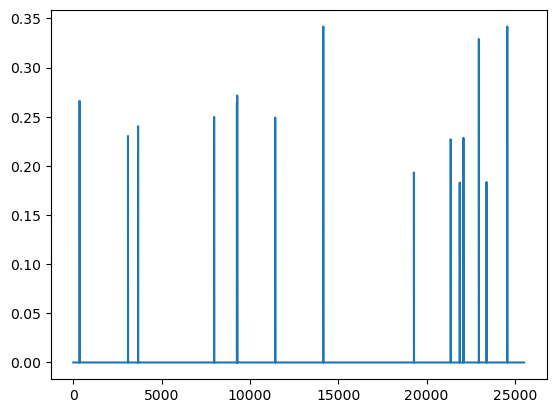

In [31]:
print(f'Sample representation of \n{movie_series.iloc[0,1]}')
plt.plot(np.asarray(X)[0])

Now, use K-means clustering to cluster the summaries base on their euclidean distance to a pre-determined centroid. Similar movies/ series will have the same centroid thus, it is simple to just take the distance is the cluster space as a measure of similarity.

In [32]:
pca = PCA(n_components=100)


In [33]:
data2 = pca.fit_transform(X)

/Users/chrischen/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [34]:
# calculate the losses for each clusters
losses = []
for K in range(1, 100):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data2)
    losses.append(kmeans.inertia_)

Text(0, 0.5, 'Loss')

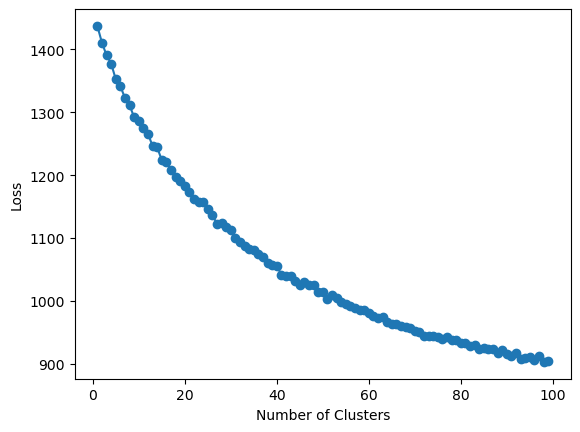

In [35]:
plt.plot(range(1,100), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

Using the Elbow method above, I will choose a cluster number = 15

In [36]:
kmeans = KMeans(n_clusters= 15)

In [37]:
# fit data2 which has reduced dimensions into the kmeans model and predict the clusters
label = kmeans.fit_predict(data2)

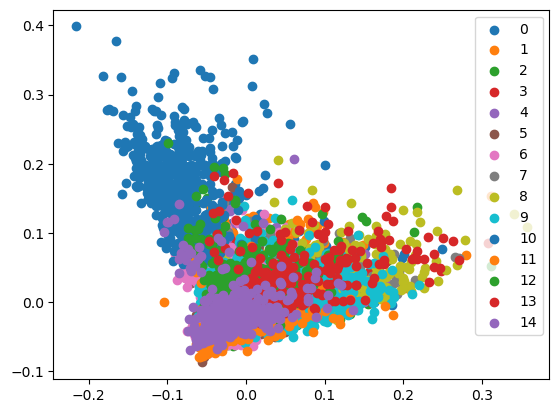

In [38]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data2[label == i , 0] , data2[label == i , 1] , label = i)
plt.legend()
plt.show()

In [39]:
# calculate the euclidean distance of each of the 15 components to the centre
euclid_dist = kmeans.fit_transform(data2)
euclid_dist

array([[0.36685342, 0.37808487, 0.3700203 , ..., 0.35146674, 0.29001361,
        0.36400225],
       [0.32616159, 0.33279142, 0.31978293, ..., 0.29684   , 0.29704322,
        0.30691053],
       [0.43641479, 0.44581741, 0.4458285 , ..., 0.42627971, 0.41580199,
        0.43118818],
       ...,
       [0.40258333, 0.404186  , 0.39682588, ..., 0.37727499, 0.37796968,
        0.37475979],
       [0.25889665, 0.26996816, 0.2634745 , ..., 0.22994666, 0.22356162,
        0.10446496],
       [0.27802233, 0.28253393, 0.2729474 , ..., 0.24235152, 0.24149184,
        0.25074766]])

In [40]:
# compute the distance between each of the summaries in the cluster-space
def recommend2(movie_id, num_recommendation=5):
    """
    A simple recommender system using PCA
    """
    print(f'You have watched:\n\n{movie_series.Title[movie_id]}')
    print(f'Brief Summary:\n\n{movie_series.Summary[movie_id]}')
    
    scores = euclid_dist[:, :10]
    
    # Compute L^2 distances to the input Score
    distances = np.sqrt(np.sum((scores - scores[movie_id, np.newaxis, :])**2, axis=1))
    
    # Return recommendations based on the closest L^2 distances 
    rec_ids = np.argsort(distances)[1:1+num_recommendation]
    rec_desc = movie_series.Summary[rec_ids].to_numpy()
    print('\n\nThe recommended movie for you to watch next is:\n')
    for i, d in zip(rec_ids, rec_desc):
        print(f'Title: {movie_series.Title[i]}\n Brief Summary: {d}')

In [41]:
recommend2(13300)

You have watched:

Spider-Man 2
Brief Summary:

Weary of leading a double life, Peter Parker shelves his superhero identity. Will he suit up again when a multitentacled baddie menaces New York City?


The recommended movie for you to watch next is:

Title: 4 Kings
 Brief Summary: When a big bet sinks a con artist and his nephew into debt, they conspire with a magician and a dancer to rip off a casino owner for a big jackpot.
Title: Spirit Riding Free: Riding Academy
 Brief Summary: A new chapter begins for Lucky and her friends as they leave Miradero behind to live and learn at the prestigious Palomino Bluffs Riding Academy.
Title: Time Is Illmatic
 Brief Summary: Providing a behind-the-scenes look at the making of Nass debut album, this documentary also delves into his deep connection to his New York roots.
Title: Larva Island
 Brief Summary: Stranded on a tropical island, two silly larva buddies find slapstick fun in everything from discovering food to meeting new animal friends.
Tit

Comparing the recommendation done based on 1. summary and 2. Individual features such as 'Genre', 'Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score', 'IMDb Votes'. I personally feel that the second option is better as the clusters are more distinct and unique from each other as seen from the diagram drawn.

# Continution of assignment for the project segment:

##### The movies and shows in the Netflix data sheet has the columns "IMDb rating" and "IMDb Votes".

Therefore, the motivation is to find out if there is any relationship between these two variables and if there is what relationship is it. Only "Movie" with "Action" genre and a "Runtime" with 1-2 hour are used for analysis for consistency.
This is accomplished by:
* Identify a supervised learning problem and employ at least 3 different methods:
    1. Linear Regression
    2. Kernel Ridge Regression with polynomial kernel with degree 3 and rbf kernel
    3. Sequential model with a 1D convolutional layer (CNN)
* Perform CV during model selection for hyperparameter tuning


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD
from keras.optimizers import Adam

In [43]:
# load the csv file into dataframe
data = pd.read_csv("../Dataset/netflix-rotten-tomatoes-metacritic-imdb.csv")

### 1. Data Pre-processing:

In [44]:
regression_data = data.loc[:,['Title','Genre','Series or Movie','Runtime','IMDb Votes','IMDb Score','Hidden Gem Score']]

In [45]:
# clean "Genre" column
regression_data['Genre'] = regression_data.Genre.str.split(r",").str.get(0)
# select only "Movie" with "Action" genre
filter1 = regression_data[(regression_data["Series or Movie"]=="Movie")&(regression_data["Genre"]=="Action")]
filter1
#&((regression_data["Runtime"]=="1-2 hour")|(regression_data["Runtime"]=="> 2 hrs"))

,Title,Genre,Series or Movie,Runtime,IMDb Votes,IMDb Score,Hidden Gem Score
16,I,Action,Movie,1-2 hour,733336.0,6.5,2.8
29,The Mysterians,Action,Movie,1-2 hour,1383.0,6.2,7.1
35,Gorath,Action,Movie,1-2 hour,636.0,5.8,7.0
68,Stray,Action,Movie,1-2 hour,688.0,4.8,7.3
79,Golden Slumber,Action,Movie,1-2 hour,1098.0,7.1,8.1
...,...,...,...,...,...,...,...
15443,Never Back Down 2: The Beatdown,Action,Movie,1-2 hour,18065.0,5.7,2.7
15449,2012,Action,Movie,> 2 hrs,353917.0,5.8,2.4
15453,3:10 to Yuma,Action,Movie,> 2 hrs,289344.0,7.7,4.0
15461,One for the Money,Action,Movie,1-2 hour,40841.0,5.3,1.3


In [46]:
# Finally, drop all entries with NA
filter2 = filter1.dropna().reset_index(drop=True)
filter2

,Title,Genre,Series or Movie,Runtime,IMDb Votes,IMDb Score,Hidden Gem Score
0,I,Action,Movie,1-2 hour,733336.0,6.5,2.8
1,The Mysterians,Action,Movie,1-2 hour,1383.0,6.2,7.1
2,Gorath,Action,Movie,1-2 hour,636.0,5.8,7.0
3,Stray,Action,Movie,1-2 hour,688.0,4.8,7.3
4,Golden Slumber,Action,Movie,1-2 hour,1098.0,7.1,8.1
...,...,...,...,...,...,...,...
1953,Never Back Down 2: The Beatdown,Action,Movie,1-2 hour,18065.0,5.7,2.7
1954,2012,Action,Movie,> 2 hrs,353917.0,5.8,2.4
1955,3:10 to Yuma,Action,Movie,> 2 hrs,289344.0,7.7,4.0
1956,One for the Money,Action,Movie,1-2 hour,40841.0,5.3,1.3


In [47]:
filter3 = filter2.loc[:,['Runtime','IMDb Votes','IMDb Score','Hidden Gem Score']]
filter3

,Runtime,IMDb Votes,IMDb Score,Hidden Gem Score
0,1-2 hour,733336.0,6.5,2.8
1,1-2 hour,1383.0,6.2,7.1
2,1-2 hour,636.0,5.8,7.0
3,1-2 hour,688.0,4.8,7.3
4,1-2 hour,1098.0,7.1,8.1
...,...,...,...,...
1953,1-2 hour,18065.0,5.7,2.7
1954,> 2 hrs,353917.0,5.8,2.4
1955,> 2 hrs,289344.0,7.7,4.0
1956,1-2 hour,40841.0,5.3,1.3


In [48]:
filter3 = pd.get_dummies(filter3)
filter3

,IMDb Votes,IMDb Score,Hidden Gem Score,Runtime_1-2 hour,Runtime_30-60 mins,Runtime_< 30 minutes,Runtime_> 2 hrs
0,733336.0,6.5,2.8,1,0,0,0
1,1383.0,6.2,7.1,1,0,0,0
2,636.0,5.8,7.0,1,0,0,0
3,688.0,4.8,7.3,1,0,0,0
4,1098.0,7.1,8.1,1,0,0,0
...,...,...,...,...,...,...,...
1953,18065.0,5.7,2.7,1,0,0,0
1954,353917.0,5.8,2.4,0,0,0,1
1955,289344.0,7.7,4.0,0,0,0,1
1956,40841.0,5.3,1.3,1,0,0,0


In [49]:
# normalise the data
scaler = MinMaxScaler()
filter3_normalised = pd.DataFrame(scaler.fit_transform(filter3), index=filter3.index, columns=filter3.columns)
filter3_normalised

,IMDb Votes,IMDb Score,Hidden Gem Score,Runtime_1-2 hour,Runtime_30-60 mins,Runtime_< 30 minutes,Runtime_> 2 hrs
0,0.317600,0.657534,0.258824,1.0,0.0,0.0,0.0
1,0.000597,0.616438,0.764706,1.0,0.0,0.0,0.0
2,0.000273,0.561644,0.752941,1.0,0.0,0.0,0.0
3,0.000296,0.424658,0.788235,1.0,0.0,0.0,0.0
4,0.000473,0.739726,0.882353,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1953,0.007822,0.547945,0.247059,1.0,0.0,0.0,0.0
1954,0.153277,0.561644,0.211765,0.0,0.0,0.0,1.0
1955,0.125311,0.821918,0.400000,0.0,0.0,0.0,1.0
1956,0.017686,0.493151,0.082353,1.0,0.0,0.0,0.0


### 2. Data Visualisation:

<AxesSubplot:>

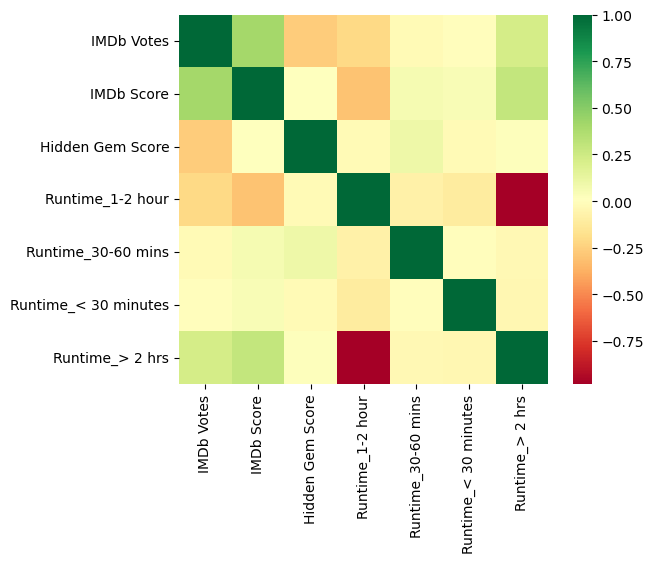

In [50]:
# investigate the pairwise correlation of all the variables
sns.heatmap(filter3_normalised.corr(), square=True, cmap='RdYlGn')

We can see strong correlation between IMDb Votes and IMDb Score and all Runtime. 
Lets formally define IMDb Votes as the target variable and IMDb Score as the input variable.

<AxesSubplot:xlabel='IMDb Score', ylabel='IMDb Votes'>

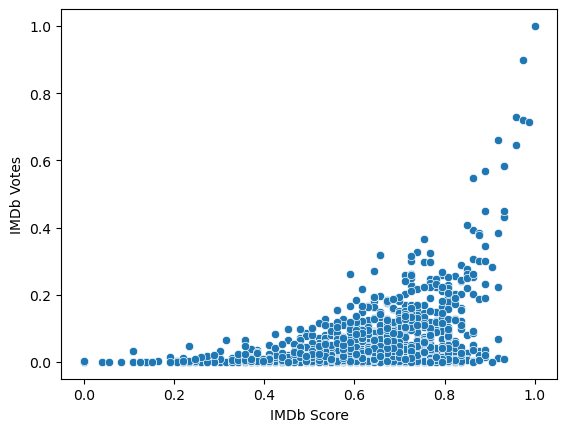

In [51]:
sns.scatterplot(
    y='IMDb Votes',
    x='IMDb Score',
    data=filter3_normalised,
)

In [52]:
# spilt the data into training and test sets and reserve 15 percent of data for testing
X_train, X_test, y_train, y_test = train_test_split(filter3_normalised.loc[:,["IMDb Score"]].to_numpy(),filter3_normalised.loc[:,["IMDb Votes"]].to_numpy(), test_size=0.15, random_state=13)

### 3. Linear regression model:

In [53]:
regressor = LinearRegression()
regressor.fit(
    X=X_train,
    y=y_train,
)
y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

Text(0.5, 1.0, 'Test set')

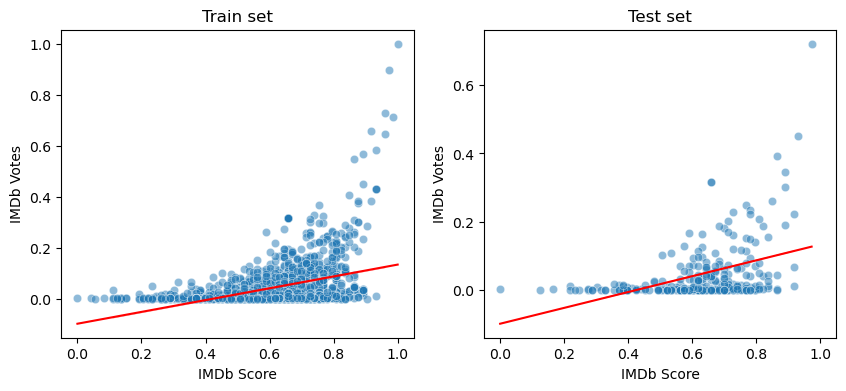

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

sns.scatterplot(
    x=X_train.ravel(),
    y=y_train.ravel(),
    ax=ax[0],
    alpha=0.5,
)
sns.lineplot(
    x=X_train.ravel(),
    y=y_hat_train.ravel(),
    ax=ax[0],
    color='red',
)

sns.scatterplot(
    x=X_test.ravel(),
    y=y_test.ravel(),
    ax=ax[1],
    alpha=0.5,
)
sns.lineplot(
    x=X_test.ravel(),
    y=y_hat_test.ravel(),
    ax=ax[1],
    color='red',
)



for a in ax:
    a.set_xlabel('IMDb Score')
    a.set_ylabel('IMDb Votes')

    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

In [55]:
print('Train Score: ',regressor.score(X_train,y_train))
print('Test Score: ',regressor.score(X_test,y_test))

Train Score:  0.1696720194918031
Test Score:  0.14505454396683293


Lets use cross validation score to give a better measure of the actual performance of the trained model

Mean accuracy: 0.14715514886618225
Std accuracy: 0.08754754095864913


/var/folders/3d/5tys651x6rl1hzlnplxtj5rw0000gn/T/ipykernel_21472/1330966837.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


<AxesSubplot:ylabel='Density'>

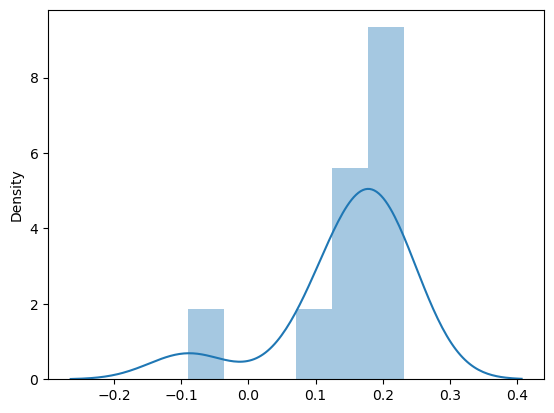

In [56]:
scores = cross_val_score(regressor, X_train, y_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [57]:
print(f'Train accuracy: {regressor.score(X_train, y_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {regressor.score(X_test, y_test)}')

Train accuracy: 0.1696720194918031
Mean CV accuracy: 0.14715514886618225
Test accuracy: 0.14505454396683293


Obviously, a linear fit is not good enough. lets explore other kernels to plot the relationship

### 4. Polynomial kernel ridge regression:

In [58]:
poly = KernelRidge()

In [59]:
poly.get_params()

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'linear',
 'kernel_params': None}

In order to perform a gridsearch for the best combination of parameters for this model, we need to set up the parameter grids first:

In [60]:
param_grid = {
    'alpha': [0.5,1.0],
    'degree': range(2,5,1),
    'kernel': ['poly'],
}

In [61]:
poly_grid = GridSearchCV(estimator=poly, param_grid=param_grid,cv=10)

In [62]:
# Now fit the polynomial kernel grid to the training data and find the best parameters
poly_grid.fit(X=X_train,y=y_train)
poly_grid.best_params_

{'alpha': 0.5, 'degree': 4, 'kernel': 'poly'}

In [63]:
poly = KernelRidge(alpha=0.5, degree= 4, kernel='poly')
poly.fit(X=X_train,y=y_train)
y_hat_train_poly = poly.predict(X_train)
y_hat_test_poly = poly.predict(X_test)

Text(0.5, 1.0, 'Test set')

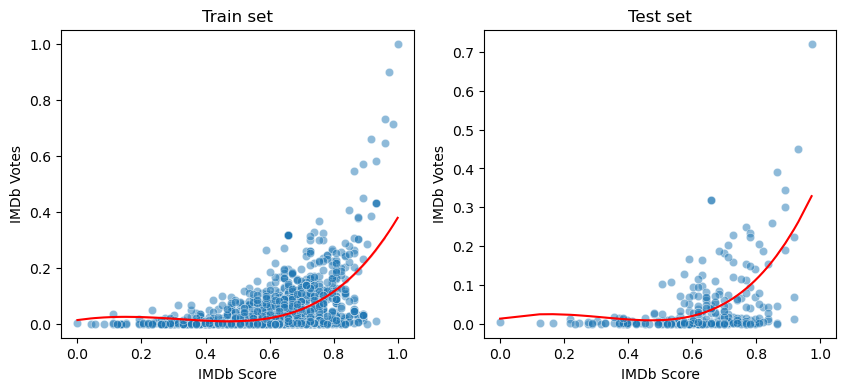

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

sns.scatterplot(
    x=X_train.ravel(),
    y=y_train.ravel(),
    ax=ax[0],
    alpha=0.5,
)
sns.lineplot(
    x=X_train.ravel(),
    y=y_hat_train_poly.ravel(),
    ax=ax[0],
    color='red',
)

sns.scatterplot(
    x=X_test.ravel(),
    y=y_test.ravel(),
    ax=ax[1],
    alpha=0.5,
)
sns.lineplot(
    x=X_test.ravel(),
    y=y_hat_test_poly.ravel(),
    ax=ax[1],
    color='red',
)



for a in ax:
    a.set_xlabel('IMDb Score')
    a.set_ylabel('IMDb Votes')

    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

In [65]:
print('Train Score: ',poly.score(X_train,y_train))
print('Test Score: ',poly.score(X_test,y_test))

Train Score:  0.33323458068090794
Test Score:  0.28672507878908715


The results are much better than that of the linear regression model

### 5. RBF kernel ridge regression:

In this section, Radial Basis Functon (rbf) Kernel will be used to fit to the training data to determine if it can be better than the previous two models used

Same as before, a gridsearch for the best combination of parameters for this model will be performed

In [66]:
rbf = KernelRidge()

In [67]:
param_grid = {
    'alpha': np.arange(0.1,1.0,0.1),
    'gamma': range(1,10,1),
    'kernel': ['rbf'],
}

In [68]:
rbf_grid = GridSearchCV(estimator=rbf, param_grid=param_grid,cv=10)

In [69]:
rbf_grid.fit(X=X_train,y=y_train)
rbf_grid.best_params_

{'alpha': 0.1, 'gamma': 9, 'kernel': 'rbf'}

In [70]:
rbf = KernelRidge(alpha=0.1, gamma=9, kernel='rbf')
rbf.fit(X=X_train,y=y_train)
y_hat_train_rbf = rbf.predict(X_train)
y_hat_test_rbf = rbf.predict(X_test)

Text(0.5, 1.0, 'Test set')

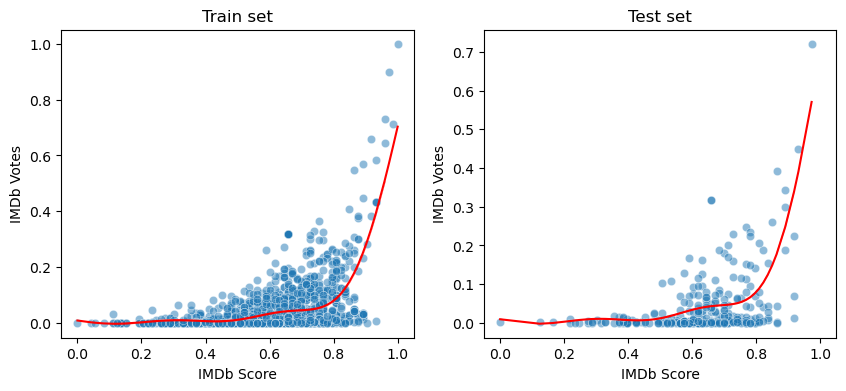

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

sns.scatterplot(
    x=X_train.ravel(),
    y=y_train.ravel(),
    ax=ax[0],
    alpha=0.5,
)
sns.lineplot(
    x=X_train.ravel(),
    y=y_hat_train_rbf.ravel(),
    ax=ax[0],
    color='red',
)

sns.scatterplot(
    x=X_test.ravel(),
    y=y_test.ravel(),
    ax=ax[1],
    alpha=0.5,
)
sns.lineplot(
    x=X_test.ravel(),
    y=y_hat_test_rbf.ravel(),
    ax=ax[1],
    color='red',
)



for a in ax:
    a.set_xlabel('IMDb Score')
    a.set_ylabel('IMDb Votes')

    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

In [72]:
print('Train Score: ',rbf.score(X_train,y_train))
print('Test Score: ',rbf.score(X_test,y_test))

Train Score:  0.4356754978908559
Test Score:  0.37763224006995466


As seen from the result, rbf has a training and test score that is better than the previous two models. In addition, from the graph, we can see that rbf kernel model is more robust in fitting to the points in the training and test set.

In [73]:
scores_rbf = cross_val_score(rbf, X_train, y_train, cv=10)

In [74]:
print(f'Train accuracy: {rbf.score(X_train, y_train)}')
print(f'Mean CV accuracy: {np.mean(scores_rbf)}')
print(f'Test accuracy: {rbf.score(X_test, y_test)}')

Train accuracy: 0.4356754978908559
Mean CV accuracy: 0.34338264559429704
Test accuracy: 0.37763224006995466


However, from the cross-validation score, we obeserve that the mean CV accuracy is fairing worse than the test accuracy, this could be a result of overfitting of the model to the training data. 

This can be definitely improved by fine-tuning the hyperparameters or exploring other machine learning models. The latter is being explored using the Sequential model in tensorflow with a 1D convolutional layer and deep neural network layers.

### 6. Sequential model with a 1D convolutional layer (CNN):

In [75]:
filter3_normalised

,IMDb Votes,IMDb Score,Hidden Gem Score,Runtime_1-2 hour,Runtime_30-60 mins,Runtime_< 30 minutes,Runtime_> 2 hrs
0,0.317600,0.657534,0.258824,1.0,0.0,0.0,0.0
1,0.000597,0.616438,0.764706,1.0,0.0,0.0,0.0
2,0.000273,0.561644,0.752941,1.0,0.0,0.0,0.0
3,0.000296,0.424658,0.788235,1.0,0.0,0.0,0.0
4,0.000473,0.739726,0.882353,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1953,0.007822,0.547945,0.247059,1.0,0.0,0.0,0.0
1954,0.153277,0.561644,0.211765,0.0,0.0,0.0,1.0
1955,0.125311,0.821918,0.400000,0.0,0.0,0.0,1.0
1956,0.017686,0.493151,0.082353,1.0,0.0,0.0,0.0


In [76]:
x,y = filter3_normalised['IMDb Score'].to_numpy(), filter3_normalised['IMDb Votes'].to_numpy()

In [77]:
x.shape

(1958,)

In [78]:
x = x.reshape(x.shape[0], 1, 1)
print(x.shape)

(1958, 1, 1)


In [79]:
x

array([[[0.65753425]],

       [[0.61643836]],

       [[0.56164384]],

       ...,

       [[0.82191781]],

       [[0.49315068]],

       [[0.65753425]]])

In [80]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

There are two types of optimizer: Adam and SGD that will be compared in the following section.

#### 6.1 Adam optimizer

In [81]:
model_adam = Sequential()
model_adam.add(Conv1D(64, 1, activation="relu", input_shape=(1,1)))
model_adam.add(Flatten())
model_adam.add(Dense(256, activation="relu"))
model_adam.add(Dense(128, activation="relu"))
model_adam.add(Dense(64, activation="relu"))
model_adam.add(Dense(1))

2022-11-18 16:46:49.633796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [82]:
model_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             128       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 57,985
Trainable params: 57,985
Non-traina

In [83]:
model_adam.compile(loss="mse", optimizer="adam")

In [84]:
model_adam.fit(xtrain, ytrain, batch_size=50,epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 0s 994us/step - loss: 0.0063
Epoch 2/200
34/34 [==============================] - 0s 960us/step - loss: 0.0059
Epoch 3/200
34/34 [==============================] - 0s 965us/step - loss: 0.0057
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 5/200
34/34 [==============================] - 0s 962us/step - loss: 0.0055
Epoch 6/200
34/34 [==============================] - 0s 931us/step - loss: 0.0056
Epoch 7/200
34/34 [==============================] - 0s 926us/step - loss: 0.0054
Epoch 8/200
34/34 [==============================] - 0s 928us/step - loss: 0.0055
Epoch 9/200
34/34 [==============================] - 0s 940us/step - loss: 0.0054
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 11/200
34/34 [==============================] - 0s 947us/step - loss: 0.0051
Epoch 12/200
34/34 [==============================] - 0s 930us/step - loss: 0.0056
Epoch 13/200
34/3

In [85]:
ypred_test = model_adam.predict(xtest)
ypred_train = model_adam.predict(xtrain)

52/52 [==============================] - 0s 578us/step


In [86]:
print(model_adam.evaluate(xtrain, ytrain))

52/52 [==============================] - 0s 824us/step - loss: 0.0037
0.00374137656763196


In [87]:
print("R2_score: %.4f" % r2_score(ytest, ypred_test))

R2_score: 0.3189


#### 6.2 SGD optimizer

In [88]:
model_SGD = Sequential()
model_SGD.add(Conv1D(64, 1, activation="relu", input_shape=(1,1)))
model_SGD.add(Flatten())
model_SGD.add(Dense(256, activation="relu"))
model_SGD.add(Dense(128, activation="relu"))
model_SGD.add(Dense(64, activation="relu"))
model_SGD.add(Dense(1))

In [89]:
model_SGD.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             128       
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 57,985
Trainable params: 57,985
Non-trai

In [90]:
model_SGD.compile(loss="mse", optimizer="SGD")

In [91]:
model_SGD.fit(xtrain, ytrain, batch_size=50,epochs=200, verbose=1)


Epoch 1/200
34/34 [==============================] - 0s 939us/step - loss: 0.0081
Epoch 2/200
34/34 [==============================] - 0s 884us/step - loss: 0.0071
Epoch 3/200
34/34 [==============================] - 0s 851us/step - loss: 0.0070
Epoch 4/200
34/34 [==============================] - 0s 884us/step - loss: 0.0070
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 6/200
34/34 [==============================] - 0s 865us/step - loss: 0.0069
Epoch 7/200
34/34 [==============================] - 0s 835us/step - loss: 0.0069
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 11/200
34/34 [==============================] - 0s 799us/step - loss: 0.0067
Epoch 12/200
34/34 [==============================] - 0s 845us/step - loss: 0.0067
Epoch 13/200
34/34 [=

In [92]:
ypred_sgd = model_SGD.predict(xtest)

10/10 [==============================] - 0s 648us/step


In [93]:
print(model_SGD.evaluate(xtrain, ytrain))

52/52 [==============================] - 0s 531us/step - loss: 0.0056
0.005564774852246046


In [94]:
print("R2_score: %.4f" % r2_score(ytest, ypred_sgd))

R2_score: 0.2131


Comparing the two optimizers' R2 score, adam optimizer seems to be the better one

Text(0.5, 1.0, 'Test set')

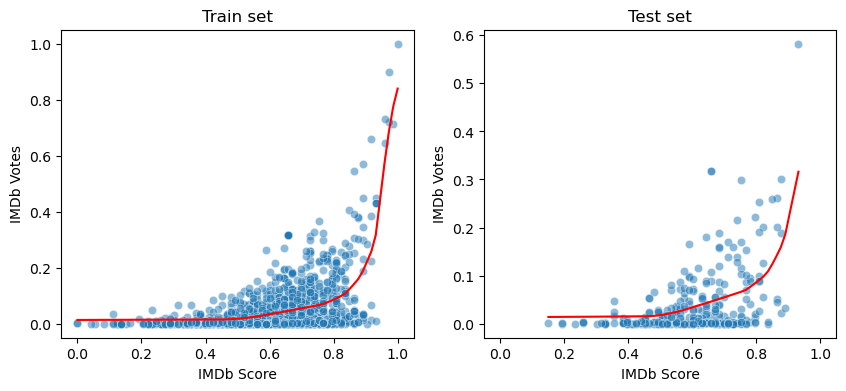

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

sns.scatterplot(
    x=xtrain.ravel(),
    y=ytrain.ravel(),
    ax=ax[0],
    alpha=0.5,
)
sns.lineplot(
    x=xtrain.ravel(),
    y=ypred_train.ravel(),
    ax=ax[0],
    color='red',
)

sns.scatterplot(
    x=xtest.ravel(),
    y=ytest.ravel(),
    ax=ax[1],
    alpha=0.5,
)
sns.lineplot(
    x=xtest.ravel(),
    y=ypred_test.ravel(),
    ax=ax[1],
    color='red',
)



for a in ax:
    a.set_xlabel('IMDb Score')
    a.set_ylabel('IMDb Votes')

    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

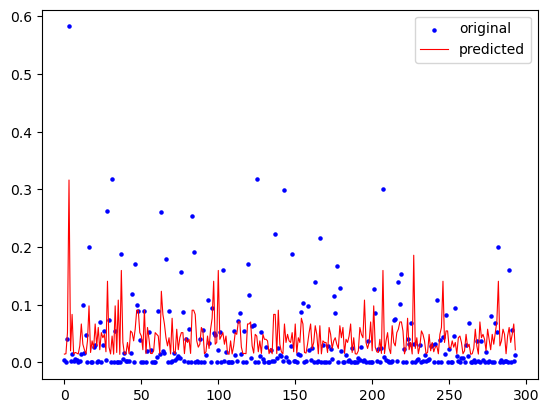

In [96]:
x_ax = range(len(ypred_test))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


The deep neural network seems to perform better than the linear regression and the polynomial ridge regression model but fair slightly worse when compared to the rbf ridge regression model. Therefore, considering the fact that DNN has more parameters and conditions to tune and satisfy, it is recommended to go with the rbf kernel trick model in order to save time and computing power. 

### 7. Areas for future improvements

1. The rbf ridge regression model is good enough for this problem and the hyperparameters can be further tuned to ensure overfitting issue is resolved.
2. DNN can be further explored ie. the learning rate and batch size and other optimizer method can be considered in order to optimize the model.
3. Unsupervised learning model can also be considered to look for any clusters that exists in the data that will help to explain some form of relationship.